<p><center><font size="4"><b>Application Example</b></font></center></p>

<p><left><font size="3"><i>Estimate the values of the parameters $k_1$ and $k_2$ by minimizing the sum of the squares of the desviations:</i></font>

<p><center><font size="4">$\phi=\sum\limits_{i=1}^n (y_{obs} - y_{pred})_{i}^2$</font></center></p>
<br>

<p><left><font size="3"><i>where</i></font>
<p><center><font size="4">$y_{pred}=\frac{k_1}{k_1 - k_2}(e^{-k_{2}t} - e^{-k_{1}t})$</font></center></p>
<br
    
<p><left><font size="3"><i>For the following data:</i></font>
    
| t             | $y_{obs}$ |
|:-------------:|:--------------:| 
|    0.5        |      0.263     | 
|    1.0        |      0.455     | 
|    1.5        |      0.548     |

<br>
<p><left><font size="3"><i>Plot the sum of squares contours and fit the coefficients.</i></font>


In [151]:
using Plots, LaTeXStrings, Printf, LinearAlgebra, Dates, SymPy
pgfplotsx()


Φ(k1, k2) = sum((Yobs - (k1/(k1 - k2))*(exp.(-k2.*t) .- exp.(-k1.*t))).^2)

Φ (generic function with 1 method)

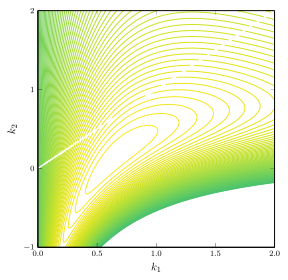

In [176]:
k1 = 0:0.01:2
k2 = -1:0.01:2

t = [0.5,1.0,1.5]
Yobs = [0.263,0.455,0.548]
pl1 = contour(k1, k2, Φ, framestyle = :box,
    levels=collect(0.01:0.01:0.8), 
    c = cgrad(:viridis, rev = true, scale = :exp), 
    ylab = L"k_2", 
    xlab = L"k_1",
    xlims = (0,2),
    ylims = (-1,2),
    legend = false,
    grid = false,
    contour_labels = false,
    bins = 150,
    label = false,
    size=(400,400))

In [177]:
x1, x2 = Sym("x1, x2")

Φsym = sum((Yobs - (x1/(x1 - x2))*(exp.(-x2.*t) .- exp.(-x1.*t))).^2)

                                    2                                       2 
⎛     ⎛ -1.5⋅x₂    -1.5⋅x₁⎞        ⎞    ⎛     ⎛ -1.0⋅x₂    -1.0⋅x₁⎞        ⎞  
⎜  x₁⋅⎝ℯ        - ℯ       ⎠        ⎟    ⎜  x₁⋅⎝ℯ        - ℯ       ⎠        ⎟  
⎜- ──────────────────────── + 0.548⎟  + ⎜- ──────────────────────── + 0.455⎟  
⎝          x₁ - x₂                 ⎠    ⎝          x₁ - x₂                 ⎠  

                                      2
  ⎛     ⎛ -0.5⋅x₂    -0.5⋅x₁⎞        ⎞ 
  ⎜  x₁⋅⎝ℯ        - ℯ       ⎠        ⎟ 
+ ⎜- ──────────────────────── + 0.263⎟ 
  ⎝          x₁ - x₂                 ⎠ 

In [178]:
function step!(f, vars, x0)
    # Simbolic part
    # Gradient
    ∇f = [diff(f,var) for var in vars]

    # Gradient
    H = hessian(f, vars)
    
    # Numeric evaluations for ∇f & H
    n∇f = ∇f
    for i=1:length(x0)
        n∇f = subs.(n∇f, (vars[i] => x0[i]))
    end
    
    nH = H
    for i=1:length(x0)
        nH = subs.(nH, (vars[i] => x0[i]))
    end
    
    return x0 - inv(N(nH))*N(n∇f)
end

step! (generic function with 1 method)

In [179]:
points = []
x0 = [0.5, 0.2]
push!(points, (x0))
vars = [x1, x2] 

ϵ = Inf

while ϵ > 0.0001
    xk = step!(Φsym, vars, x0)
    push!(points, (xk))
    ϵ = abs(Φsym(xk[1], xk[2]) - Φsym(x0[1], x0[2]))
    x0 = xk
end

xk

2-element Array{Float64,1}:
 0.6630419352680669
 0.15457849775334723

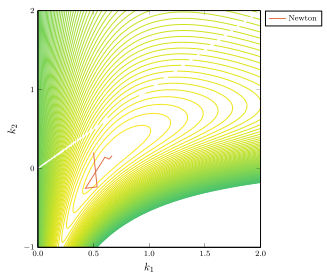

In [180]:
plot!([P[1] for P in points], [P[2] for P in points], label = "Newton", legend = true, lw = 1)

In [181]:
Ypredicted(k1, k2) = (k1/(k1 - k2))*(exp.(-k2.*t) .- exp.(-k1.*t))

Ypredicted (generic function with 1 method)

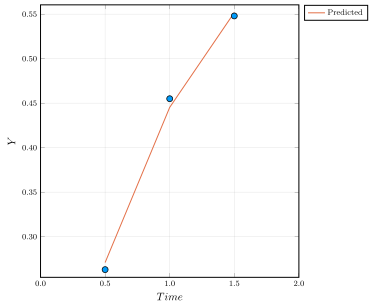

In [183]:
Yp = Ypredicted(points[end][1], points[end][2])

scatter(t, Yobs, framestyle = :box,size = (450,450), ylab = L"Y", 
    xlab = L"Time", label = "", xlim = (0,2))
plot!(t, Yp, label = "Predicted")